### Ensemble

- 여러 분류/회귀 모델들의 prediction을 수집하여 하나의 prediction을 내는 방법


### Random Forest

- Decision Tree의 Ensemble

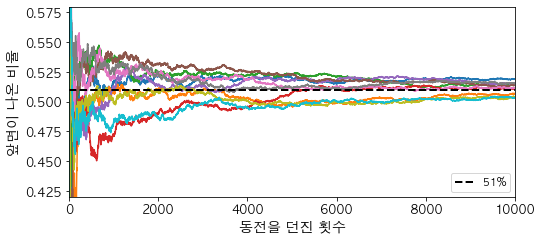

In [89]:
import numpy as np
import os

if os.name == 'posix':
    plt.rc('font', family = 'AppleGothic')
    
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

#앞면 51% 뒷면 49%의 동전 던지기 10번 실험

heads_proba = 0.51
coin_tosses = (np.random.rand(10000,10) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis = 0)/np.arange(1,10001).reshape(-1,1)

plt.figure(figsize=(8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0,10000], [0.51, 0.51], 'k--', linewidth=2, label='51%')
plt.xlabel('동전을 던진 횟수')
plt.ylabel('앞면이 나온 비율')
plt.legend(loc='lower right')
plt.axis([0, 10000, 0.42, 0.58])
plt.show()


In [16]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [29]:
X, y = make_moons(n_samples=500, noise=0.30, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('sf', svm_clf)],
    voting = 'hard'
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('sf', SVC())])

In [31]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.888
SVC 0.896
VotingClassifier 0.904


In [42]:
svm_clf2 = SVC(probability = True)

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('sf', svm_clf2)],
    voting = 'soft'
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('sf', SVC(probability=True))],
                 voting='soft')

In [43]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


## 7.2 Bagging & Pasting

In [52]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500,
    #트리 분류기 500개를 사용해서 앙상블 학습 진행.
    max_samples = 100, bootstrap = True, n_jobs = -1)
#n_jobs 는 훈련과 예측에 사용할 CPU 코어 수로, -1로 지정할 시 가용한 모든 코어를 사용

tree_clf = DecisionTreeClassifier()

bag_clf.fit(X_train,y_train)
tree_clf.fit(X_train,y_train)
y_pred_bag = bag_clf.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)

In [53]:
print(accuracy_score(y_test, y_pred_bag))

0.912


In [54]:
print(accuracy_score(y_test, y_pred_tree))

0.848


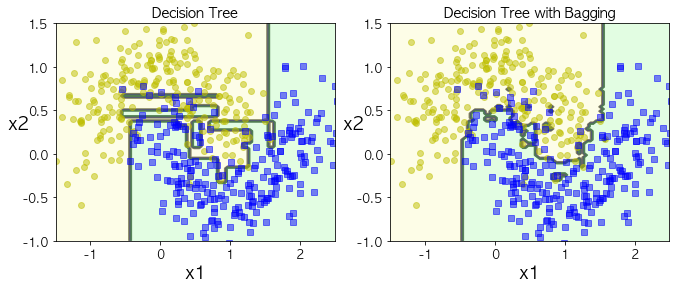

In [87]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes = [-1.5, 2.5, -1, 1.5], alpha = 0.5, contour = True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    #ravel()은 1차원으로 만드는 메서드
    #np.c_는 2개의 1차원 배열을 Column으로 붙여서 2차원 배열을 만드는 함수
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1,x2, y_pred, alpha = 0.3, cmap = custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1,x2, y_pred, cmap = custom_cmap2, alpha = 0.8)
    plt.plot(X[:,0][y==0],X[:,1][y==0],'yo',alpha=alpha)
    plt.plot(X[:,0][y==1],X[:,1][y==1],'bs',alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r'x1',fontsize=18)
    plt.ylabel(r'x2',fontsize=18,rotation=0)
    
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title('Decision Tree',fontsize=14)

plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title('Decision Tree with Bagging', fontsize = 14)
plt.show()

In [62]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500,
    bootstrap = True, n_jobs = -1, oob_score = True)

bag_clf.fit(X_train,y_train)
bag_clf.oob_score_

0.9013333333333333

In [63]:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.896

## 7.4 Random Forest

- RandomForestClassifier는 BaggingClassifier에 DecisionTreeClassifier를 넣어 만드는 대신 결정 트리에 최적화되어 있음

In [64]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

# bag_clf = BaggingClassifier(
#     DecisionTreeClassifier(max_features = "auto", max_leaf_nodes = 16),
#     n_estimators = 500, max_samples = 1.0, bootstrap = True, n_jobs = -1)
#위 RandomForestClassifier와 유사하게 만든 BaggingClassifier

In [76]:
from sklearn.datasets import load_iris

iris = load_iris()

iris_rnd_clf = RandomForestClassifier(n_estimators = 500, n_jobs = -1)
iris_rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], iris_rnd_clf.feature_importances_):
    #zip의 역할은 각각의 array에서 element 하나씩 뽑아오는 듯
    print(name, score)

sepal length (cm) 0.09722177960391026
sepal width (cm) 0.022386037360675695
petal length (cm) 0.44087213615437465
petal width (cm) 0.43952004688103946


In [77]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)

rnd_clf = RandomForestClassifier(n_estimators = 10)
rnd_clf.fit(mnist['data'], mnist['target'])

RandomForestClassifier(n_estimators=10)

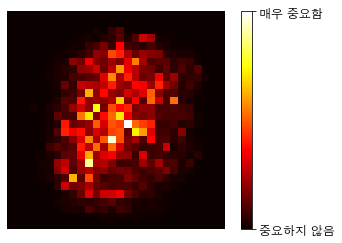

In [80]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap = matplotlib.cm.hot, interpolation='nearest')
    plt.axis('off')
    
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks = [rnd_clf.feature_importances_.min(),rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['중요하지 않음', '매우 중요함'])
plt.show()

## 7.5 Boosting<h4>(Hypothesis Boosting)</h4>

- Weak Learner(약한 학습기) 여러 개를 연결하여 앞의 모델을 보완해나가면서 Strong Learner를 만드는 Ensemble method.

=> 앞에서 잘못 분류된 훈련 샘플의 가중치를 상대적으로 높여서 다음 분류기에 업데이트된 가중치를 사용하는 방법

ex) AdaBoost(Adaptive Boosting), Gradient Boosting

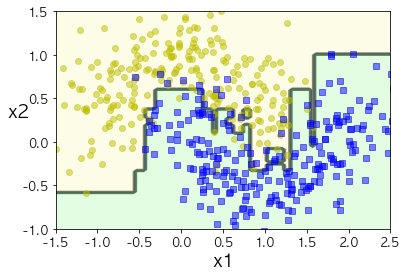

In [94]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1), n_estimators = 200, algorithm = 'SAMME.R',
                                                    learning_rate = 0.5)

ada_clf.fit(X_train, y_train)

plot_decision_boundary(ada_clf, X,y)

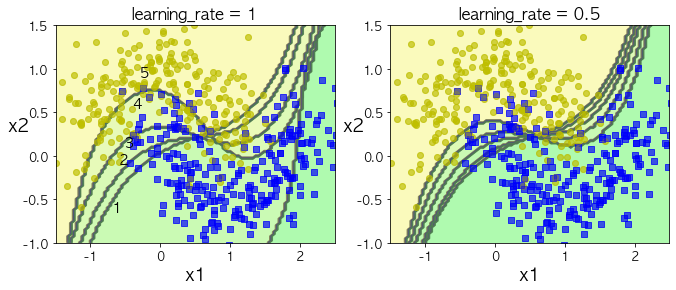

In [96]:
m = len(X_train)

plt.figure(figsize = (11,4))
for subplot, learning_rate in ((121,1), (122,0.5)):
    sample_weights = np.ones(m)
    plt.subplot(subplot)
    if subplot == 121:
        plt.text(-0.7, -0.65, "1", fontsize = 14)
        plt.text(-0.6, -0.10, "2", fontsize = 14)
        plt.text(-0.5, 0.10, "3", fontsize = 14)
        plt.text(-0.4, 0.55, "4", fontsize = 14)
        plt.text(-0.3, 0.90, "5", fontsize = 14)
        
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C = 0.05, gamma = 'auto')
        svm_clf.fit(X_train, y_train, sample_weight = sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha = 0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize = 16)

In [101]:
np.random.seed(42)

X = np.random.rand(100,1) - 0.5
y = 3*X[:,0]**2 + 0.05*np.random.randn(100)

from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth = 2)
tree_reg1.fit(X,y)

y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth = 2)
tree_reg2.fit(X,y2)

y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth = 2)
tree_reg3.fit(X,y3)

X_new = np.array([[0.8]])

y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [104]:
for tree in (tree_reg1, tree_reg2, tree_reg3):
    print(tree.predict(X_new))

[0.52856846]
[0.03991297]
[0.18178637]
